<a href="https://colab.research.google.com/github/HanSong19/PALS0039-Introduction-to-Deep-Learning-for-Speech-and-Language-Processing-/blob/main/Ex_3_1_Keras%20Practice_thesis%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

#Exercise 3.1 Keras practice

In this exercise we use Keras to build and train a small 4-2-4 [autoencoder](https://en.wikipedia.org/wiki/Autoencoder).

(a) The following code block constructs a simple network with 4 inputs, one hidden layer (with 2 nodes), and 4 outputs. Run the code and add comments to explain what each line does. Is this a regression or classification model? What are the ranges of output values the model is capable of producing?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model                           ## sequential is a multi-layer neutral network
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = Sequential()                                                            ## prepare a model (model is empty at this point)

model.add(Dense(2, activation='sigmoid', input_shape=(2,), name="hidden_layer"))# model.add: adding layer to the model
                                                                                # (no need to "add" the input layer because I only need input form as in input_shape)
                                                                                # Dense fully connects the current layer to all previous input including weights
                                                                                # the first parameter '2' shows the number of perceptrons (units). The number can change
                                                                                # input_shape: is only needed in the first layer and it stores weightsn (from the second layer, it is automatic)
                                                                                #              it is a single vector that has 4 features (inputs)
                                                                                # if needed, more hidden_layers can be added

model.add(Dense(6, activation='sigmoid', name="output_layer"))                  # the output layer has 4 features (perceptrons)

sgd = SGD(learning_rate=0.1, momentum=0.9)                                      # optimiser is stochaic gradient descent, learning rate of 0.1 is fast
                                                                                # momentum takes the precise stop into account
model.compile(loss='mse', optimizer=sgd)                                        # model.compile: finish/conceal the model and the model is ready to run
                                                                                ## the first node has 10 parameters (4 input features) x (2 outputs) + 2 biases
                                                                                ## the second node has 12 parameters (2 input features) x (4 outputs) + 4 biases

model.summary()

'''
the model looks like this

input hidden output
x.             x
x.      x.     x
x.      x.     x
x              x

This model reduces the dimension. 4 input to 2 in the hidden layer. why? 
maybe 4 features are too many and see if we can reduce dimensions.
auto encoder is often used to reduce the #of features automatically.

'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 6)                 18        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


'\nthe model looks like this\n\ninput hidden output\nx.             x\nx.      x.     x\nx.      x.     x\nx              x\n\nThis model reduces the dimension. 4 input to 2 in the hidden layer. why? \nmaybe 4 features are too many and see if we can reduce dimensions.\nauto encoder is often used to reduce the #of features automatically.\n\n'

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model                           
                                                                                ## if tensorflow is only imported, I need to use it as a=tensor.flow.keras.models.Sequential ()
from tensorflow.keras.layers import Dense                                       ## However, when I import Sequential from tensorflow.keras.models, then I can just call it a=Sequential()
from tensorflow.keras.optimizers import SGD

# Instructions to build the Keras model
def build_model():

  model = Sequential()
  
  model.add(Dense(3, activation='softmax', input_shape=(6,), name="hidden_layer"))
  
  model.add(Dense(6, activation='softmax', name="output_layer"))
  
  sgd = SGD(learning_rate=0.1, momentum=0.9)
 
  model.compile(loss='mse', optimizer=sgd)
  return model

# Input data
X2= np.array([[24,12,8,0,8,0],
              [0,0,0,4,0,4]])
X= np.array([[24.0,0.0],
              [12.0,0.0],
              [8.0,0.0],
              [0.0,4.0],
              [8.0,0.0],
              [0.0,4.0]])



Y = np.array([[548,0.0],
              [290.0,0.0],
              [196.0,5.0],
              [35.0,41.0],
              [173.0,13.0],
              [42.0,45.0]])

Y2 = np.array([[548,290,196,35,173,42],
               [0,0,5,41,13,45]])

print("Input\n", X2)
print("Output\n", Y2)

#(a)
# - Regression
# - [0.0, 1.0] -- Sigmoid activation function

Input
 [[24 12  8  0  8  0]
 [ 0  0  0  4  0  4]]
Output
 [[548 290 196  35 173  42]
 [  0   0   5  41  13  45]]


In [4]:
print(X2.shape)

(2, 6)


In [ ]:
'''
import pandas as pd
X = pd.read_csv("/content/ba_freq_neut_input.csv", index_col=False, header=None)
X = X.iloc[:, [1]]
print(X)
Y = pd.read_csv("/content/ba_freq_neut_output.csv", header=None)
Y = Y.iloc[:, [1]]
Y
'''

'\nimport pandas as pd\nX = pd.read_csv("/content/ba_freq_neut_input.csv", index_col=False, header=None)\nX = X.iloc[:, [1]]\nprint(X)\nY = pd.read_csv("/content/ba_freq_neut_output.csv", header=None)\nY = Y.iloc[:, [1]]\nY\n'

(b) Complete the code block below to train the model on the data defined above using the model's [`fit` method](https://keras.io/api/models/model_training_apis/#fit-method). Use the specification in the comments to set up the training parameters accordingly.

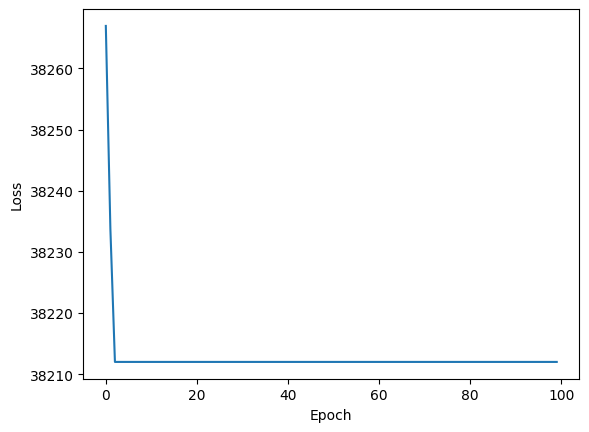

1/1 [==============================] - 0s 119ms/step
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [8]:
2# Build the model using the earlier function
# Now my model is created (4 input, 2 hidden, 4 output as designed in the previous cell)
model = build_model()

# Train the model using 1000 iterations through the dataset with weight updates after processing each individual sample:
# verbos: shows the process, verbose = 0: shows nothing, verbose = 1 shows === process, verbose = 2 shows 1/1000
#(b) train the model and show the history of loss
training = model.fit(X2,Y2, epochs=100, batch_size=1, verbose=0)

# Plot the value of the loss function over training
# .history['loss'] shows the training records of 'lose'. I can also search the record of ['accuracy'], ['val_accuacy'] etc.
plt.plot(training.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Print the predicted output values for the training data
# predit the input data (X)
# np.around is used to round floating-point datatypes
prediction = model.predict(X2)
print(np.around(prediction, decimals=2), sep="\n")


The following code block displays the network configuration, including number of parameters (weights) that were estimated during training. Furthermore it displays the actual weights and biases of the trained model.

In [9]:
# Print a summary of the structure of the model
model.summary()

# Get the weights as a numpy array
weights=model.get_weights()

# Print the weights for the different layers
print()
print("hidden-to-input:", weights[0], "", sep="\n")
print("hidden-bias:", weights[1], "", sep="\n")
print("output-to-hidden:", weights[2], "", sep="\n")
print("output-bias:", weights[3], "", sep="\n")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 3)                 21        
                                                                 
 output_layer (Dense)        (None, 6)                 24        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________

hidden-to-input:
[[ 11.004029   -13.943832     2.456261  ]
 [  4.6528134   -6.5485516    1.1753216 ]
 [  3.6995528   -5.356499     1.414465  ]
 [ -0.1814618   -0.09713417  -0.66095364]
 [  3.715473    -4.2596517    1.4452732 ]
 [ -0.7671588    0.7037102    0.39794025]]

hidden-bias:
[ 0.45203102 -0.49796653  0.04593537]

output-to-hidden:
[[ 3.4002781e+01 -3.4583533e+00 -9.1332731e+00 -7.9586301e+00
  -7.3168073e+00 -6.8960333e+00]
 [ 7.2492275e+00 

(c) Using the sigmoid function defined below, write some code to manually calculate the outputs of the network using the `weights` and `X` as input. **OR** Explain how the weights and biases are used to calculate the networks outputs.

In [13]:
# definition of the signoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
#(c)
#For each training sample:
for i in range(4):
  # Get the input
  input = X[i]
  # Calculate the hidden layer activations
  hidden_activations = sigmoid(np.matmul(input, weights[0]) + weights[1])
  # Get the output layer activations
  output_activations = sigmoid(np.matmul(hidden_activations, weights[2]) + weights[3])
  # Print the input, hidden and output values for this sample
  print(input, np.around(hidden_activations, decimals=2), np.around(output_activations, decimals=2), sep="\t")


ValueError: ignored

# (d) What are autoencoders useful for?

In [ ]:
#(d)
#https://en.wikipedia.org/wiki/Autoencoder#Applications